<a href="https://colab.research.google.com/github/samuelgeev/stock-market-pred/blob/main/Stock_Market_Pred_%2B_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#import the libraries
import math
#import pandas_datareader as web ##Doesnt work anymore
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import requests
from datetime import datetime
import io 

In [79]:
from os import pardir
class YahooData:
  def fetch(ticker, start, end):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'
    }

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"
    
    r = requests.get(url, headers=headers)
    pdr = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return pdr

In [80]:
#Get the stock quote
df = YahooData.fetch('AAPL', start = '2014-01-01', end = '2022-04-10')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.494318,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.110037,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.203342,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.080309,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.188478,258529600


In [81]:
df.shape

(2083, 6)

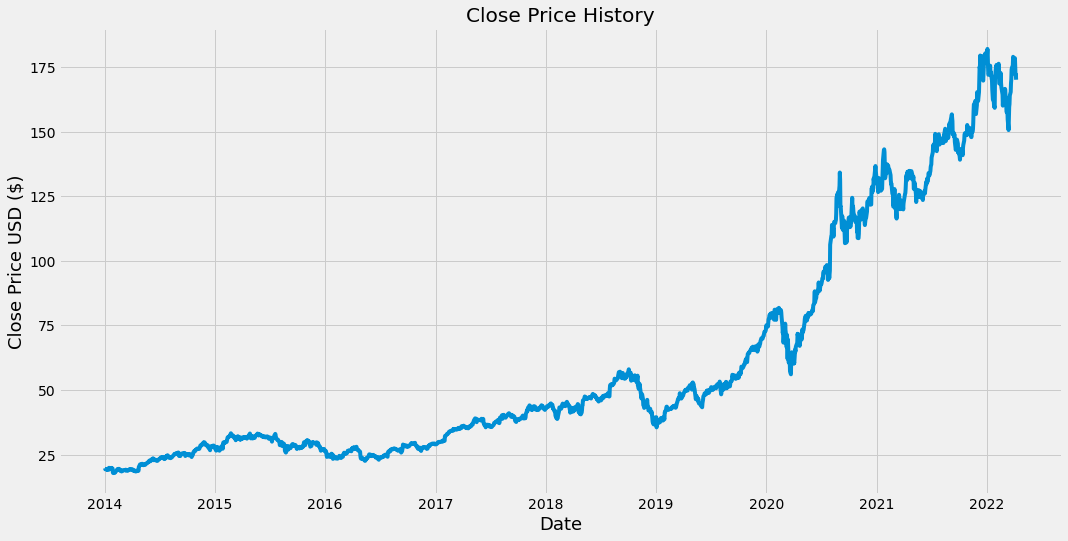

In [82]:
#Visualize closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [83]:
#Create new df with only close column
data = df.filter(['Close'])
#Convert the df to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
print("length of training set = ", training_data_len)

length of training set =  1667


In [84]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01160666],
       [0.00896335],
       [0.00960514],
       ...,
       [0.93798764],
       [0.93987602],
       [0.92738823]])

In [85]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01072339, 0.01125423, 0.01227021,
       0.01007072, 0.01103448, 0.00146199, 0.00021103, 0.        ,
       0.0001784 , 0.00038072, 0.00196018, 0.00278691, 0.0027695 ,
       0.00432938, 0.00635484, 0.00787122, 0.0078625 , 0.00971393,
       0.00961818, 0.01005331, 0.00817797, 0.00682476, 0.00554117,
       0.00604155, 0.00484717, 0.00382248, 0.00606767, 0.00575657,
       0.00608725, 0.00684434, 0.00708801, 0.00673774, 0.0066703 ,
       0.00677473, 0.00789948, 0.00801262, 0.00671599, 0.00541935,
       0.00586534, 0.00687915, 0.0068487 , 0.00629175, 0.00719896,
       0.00857392, 0.00983575, 0.00870228, 0.00819755, 0.00806701])]
[0.008040913078409581]

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.0

In [86]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train  = np.array(x_train), np.array(y_train)

In [87]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1607, 60, 1)

In [88]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [89]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [90]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1607/1607 [==============================] - 46s 26ms/step - loss: 5.1947e-04


In [91]:
#Create the testing dataset
#Create a new array containing scaled values from index 1607 to 2083
test_data = scaled_data[training_data_len - 60:, :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [92]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [93]:
#reshape the data since LSTM expects 3D shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [94]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [95]:
#get the rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("rmse = ", rmse)

rmse =  0.9240161189798204


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


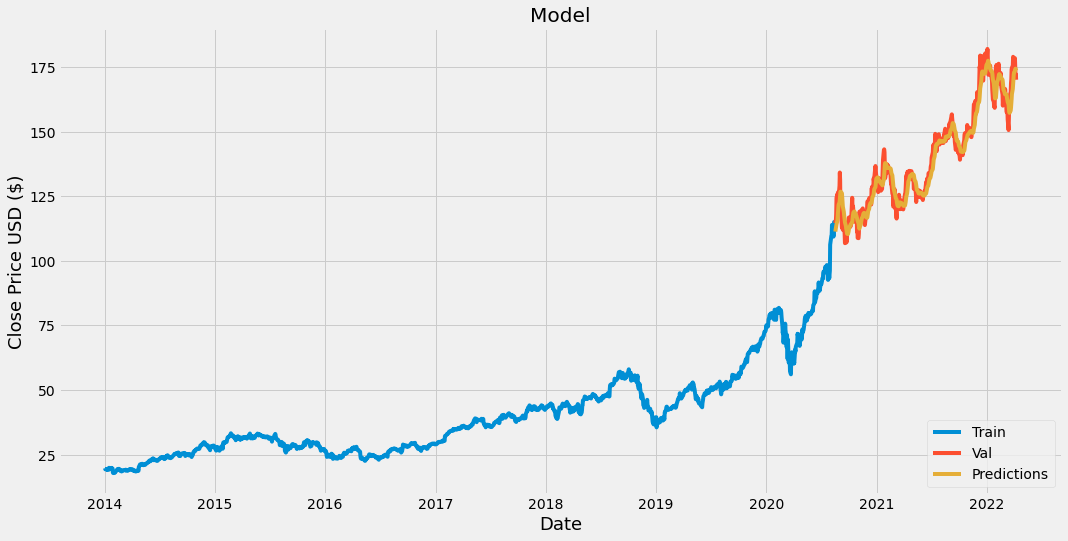

In [96]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [97]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-08-17,114.607498,111.311073
2020-08-18,115.562500,112.058395
2020-08-19,115.707497,112.755936
2020-08-20,118.275002,113.369110
2020-08-21,124.370003,114.154724
...,...,...
2022-04-04,178.440002,173.417557
2022-04-05,175.059998,174.099792
2022-04-06,171.830002,174.374741


In [98]:
#Get the quote
tsla_quote = YahooData.fetch('AAPL', start = '2014-01-01', end = '2022-04-10')
#Create a new dataframe
new_df = tsla_quote.filter(['Close'])
#Get the last 60 day closing price values & convert dataframe to array
last_60_days = new_df[-60:].values
#Scale the data to values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert the X_test data to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print("Predicted Price = ", pred_price)

Predicted Price =  [[172.94633]]


In [105]:
#Get the quote
tsla_quote2 = YahooData.fetch('AAPL', start = '2022-04-11', end = '2022-04-12') # Putting start and end date = '2022-04-11' doesn't work for whatever reason
print(tsla_quote2['Close'])

Date
2022-04-11    165.75
Name: Close, dtype: float64


""
404 Not Found: Timestamp data missing.
